In [2]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from nltk.tokenize import word_tokenize, sent_tokenize 
from nltk import pos_tag,chunk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
from nltk.util import ngrams
import re

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,adjusted_rand_score













In [3]:

Data = pd.read_csv("Business_Intelligence.csv")

In [4]:
Data['Description'] = Data['Description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Data['Description'] = Data['Description'].str.replace('[^\w\s]','')
stop = stopwords.words('english')


Data['Description'] = Data['Description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))



#
#import nltk
## Tockenizing the words
#tokens = nltk.word_tokenize(string)
#print(tokens)


In [5]:
import nltk
Data["unigrams"] = Data["Description"].apply(nltk.word_tokenize)


In [6]:
Data['unigrams']

0      [role, editor, location, hyderabad, team, cand...
1      [bachelors, degree, quantitative, discipline, ...
2      [job, advert, want, take, technology, next, le...
3      [bangalore, india, fulltime, solutionec, belie...
4      [summary, bachelors, degree, computer, science...
                             ...                        
661    [strategy, consultant, usbased, information, t...
662    [primary, skills, must, strong, practical, exp...
663    [category, information, technology, telecom, l...
664    [description, us, target, iconic, brand, fortu...
665    [iss, governance, governance, offerings, inclu...
Name: unigrams, Length: 666, dtype: object

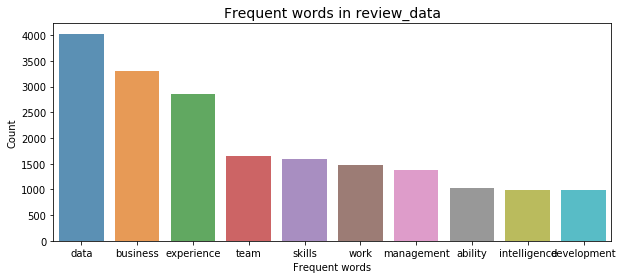

In [7]:
Word_freq = pd.Series(' '.join(Data['Description']).split()).value_counts()[:10]
Word_freq
plt.figure(figsize=(10,4))
sns.barplot(Word_freq.index, Word_freq.values, alpha=0.8)
plt.ylabel("Count")
plt.xlabel("Frequent words")
plt.title('Frequent words in review_data', loc='Center', fontsize=14)
plt.show()

In [8]:
Word_freq = pd.Series(' '.join(Data['Description']).split()).value_counts()[:20]
Word_freq

data            4029
business        3311
experience      2850
team            1645
skills          1590
work            1482
management      1377
ability         1030
intelligence     995
development      981
knowledge        975
analytics        940
years            879
strong           870
solutions        842
support          825
requirements     810
analysis         792
job              768
working          767
dtype: int64

In [9]:
#experience=[]
#try:
#    
#    for sentence in Data['Description']:
#        #find the index of the sentence where the degree is find and then analyse that sentence
#        sen=" ".join([words[0].lower() for words in sentence]) #string of words in sentence
#        if re.search('experience',sen):
#            sen_tokenised= nltk.word_tokenize(sen)
#            tagged = nltk.pos_tag(sen_tokenised)
#            entities = nltk.chunk.ne_chunk(tagged)
#            for subtree in entities.subtrees():
#                for leaf in subtree.leaves():
#                    if leaf[1]=='CD':
#                        experience=leaf[0]
#except Exception as e:
#    
#    
#    print  
#    if experience:
#        Data['experience'] = experience
#    else:
#        Data['experience']=0
#    if debug:
#            print "\n", pprint(Data), "\n"
#            code.interact(local=locals())


In [10]:
#similar_to = {
#    'edu' : ['education', 'study', 'academics', 'institute', 'school', 'college'],
#    'exp' : ['job', 'internship', 'training', 'research', 'career', 'profession', 'role'
#             'project', 'responsibility', 'description', 'work experience', 'workshop', 'conference'],
#    'skill' : ['skill','Data Analysis' 'languages', 'technology', 'framework', 'tools', 'database','SQL',' Python','DBMS','Power BI',' Tableau',' MicroStrategy',' Domo','Excel','Presentation','Relational Database','Azure','SQL',
#'Data Analytics','Computer Science','Data Modeling','Data Warehousing','Database management','PowerPoint','Group presentations','Interviewing stakeholders to secure information','Presenting graphical data','Drawing consensus on research priorities','Facilitating group discussion','Writing summaries','Technical writing','Pitching proposals','Teamwork','Listening','Conveying complex information in understandable terms','Leadership','Identifying and prioritizing problem areas','Determining factors that contribute to problems','Weighing alternative solutions','Assessing stakeholder perceptions regarding problems','Estimating costs for interventions','Proposing solutions','Persuading others to adopt solutions','Creativity','Decision making','Research','Project management','Leading brainstorming sessions','Adapting to changing priorities','Assessing client/end-user needs','Attention to detail','Business strategies','C/C++','Client relations','Coaching','Coding','Collaboration','Computer science','Consulting','Coping with deadline pressure','Creating reports','Creating and running what-if simulations','Data architecture','Data controls','Data management','Data modeling','Data visualization','Debugging data output irregularities ','Defining data access methods','Delegating','Designing enterprise-level reporting','Designing/modifying data warehouses','Evaluating business intelligence software','Extract, transform, load (ETL) testing','Facilitating the creation of new data-reporting models','Finding trends/patterns','IBM Cognos Analytics','Innovation','Insights','Java','Leading cross-functional teams','Maintaining technical documentation for solutions','Managing relationships with vendors','Managing stress','MatLab','Mentoring','Microsoft Excel','Microsoft Integration Services','Microsoft Office','Microsoft Power BI','Modeling','Monitoring data quality','Motivating staff','Multitasking','Negotiating','Online analytical processing (OLAP)','Organizational approach','Programming','Python','Reporting tools','Researching solutions to user problems','Results oriented','SAS','Statistical analysis','Statistical knowledge','Strategic thinking','Time management','Training end users','Translating high-level design into specific implementation steps','Web analytic tools',
#'Survey design','Formulating data queries','SAS','SPS','Coding data','Drawing inferences','Microsoft','Applying scientific methods to gathering data','Critical thinking','Quantitative analysis','SQL programming','Identifying high-value areas for inquiry','Establishing benchmarks','Identifying and measuring correlations','Intellectual curiosity','Classifying data','Strategic planning','Industry trend analysis','Interpreting professional literature','Identifying best practices','Developing relationships with industry experts and influencers','Understanding the impact of economic cycles on your industry sector','Participating in industry-focused professional meetings and conferences',
#],
#    'extra' : ['introduction', 'intro', 'achievement', 'hobby', 'links', 'additional', 
#               'personal', 'award', 'objective', 'miscellaneous', 'interest']
#}
#
#list_of_sections = similar_to.keys()

## to bring similar_words to their normal forms
#for section in list_of_sections:
#    new_list = []
#    
#    for word in similar_to[section]:
#        docx = nlp(word)
#        new_list.append(docx[0].lemma_)
#        
#    if flag_print:
#        print(section, new_list)
#        
#    similar_to[section] = new_list

In [13]:
#Duplicates
#Skill1=list(dict.fromkeys(Skill))

In [14]:
#len(Skill1)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(Data['Description'])
frequencies = sum(sparse_matrix).toarray()[0]
p=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

In [12]:
p.sort_values(['frequency'],ascending=True)

,frequency
000 per,1
minimum implementations,1
minimum market,1
minimum one,1
minimum requirement,1
...,...
data analytics,204
ability work,209
communication skills,289
years experience,300


In [17]:
#i='
#'
#word = "dog"
#str1 = "the dogs barked"
#sum(i == word for word in str1.split())

In [18]:
#word = 'dog'
#str1 = 'the dog barked'
#sum(i == word for word in str1.split())

In [19]:
#import re
#
#
#
#word = "dog"
#str = "the dogs dog barked"
#print(len(re.findall(word, str)))


In [13]:
sentence=Data['Description'].to_list()
Sentence_join=' '.join(sentence)
Sentence_join


'role editor location hyderabad team candidate part energetic highly motivated business transcription team based hyderabad india team responsible creating publicationquality transcripts conference calls conducted corporates team uses intelligent speech recognition software along stateofthe art editing tools deliver transcripts real time highest quality impact part team means getting ground floor something huge exciting significant going revolutionize transcripts produced delivered clients editor would ensure following transcribe calls real time using speech recognition software working rapid pace proofread correct incoming streaming realtime text feed match financial conference call audio close verbatim possible proofread edit transcripts audio event maintain low error rate contributing highquality transcripts whats candidate get broad exposure business terminology used corporate conference calls business transcription process stateoftheart tools used producing high quality transcripts

In [14]:

resume=pd.read_csv("resumestext.csv")

In [15]:
#resume['0'][3]

In [16]:
Technical_Skills = ['Data Analysis','Data analytics' ,'Languages', 'technology', 'framework', 'tools', 'database','SQL',' Python','DBMS','Power BI',' Tableau','Domain Knowledge',' MicroStrategy',' Domo','Excel','Relational Database','Azure','Sql','Tableau','Python','Java','Big Data','Oracle','Machine Learning','Crm','Data Analysis','Agile','Excel','Mysql','Etl',
'Data Analytics','Computer Science','Data Modeling','Data Warehousing','Database management','C/C+','Coding','Computer science','Data architecture','Data controls','Data management','Data modeling','Data visualization','Debugging data output irregularities ','Defining data access methods','Designing enterprise-level reporting','Designing/modifying data warehouses','Evaluating business intelligence software','Extract, transform, load (ETL) testing','Facilitating the creation of new data-reporting models','Finding trends/patterns','IBM Cognos Analytics','Insights','Java','Leading cross-functional teams','Maintaining technical documentation for solutions','MatLab','Microsoft Excel','Microsoft Integration Services','Microsoft Office','Microsoft Power BI','Modeling','Monitoring data quality','Online analytical processing (OLAP)','Programming','Python','Reporting tools','Researching solutions to user problems','Results oriented','SAS','Statistical analysis','Statistical knowledge','Training end users','Translating high-level design into specific implementation steps','Web analytic tools',
'Survey design','Formulating data queries','SAS','SPS','Coding data','Qlik','Drawing inferences','Microsoft','Applying scientific methods to gathering data','Quantitative analysis','SQL programming','Technology','Machine Learning','Neural Networks'
]

In [17]:
Technical_Skills=list(dict.fromkeys(Technical_Skills))

In [18]:
Generic_Skills=['creativity',
 'interpersonal communication',
 'critical thinking',
 'problem solving',
 'public speaking',
 'customer service',
 'teamwork',
 'communication',
 'collaboration',
 'accounting',
 'active listening',
 'adaptability',
 'negotiation',
 'conflict resolution',
 'decision-making',
 'empathy',
 'decision making',
 'management',
 'leadership',
 'organization',
 'emotional intelligence',
 'strong work ethic',
 'time management',
 'self-confidence',
 'handling pressure',
 'motivation',
 'networking',
 'business etiquette',
 'planning',
 'analyzing',
 'benchmark development',
 'brainstorming',
 'drawing conclusions',
 'experimenting',
 'innovation',
 'insight',
 'project design',
 'solution design',
 'test development',
 'troubleshooting',
 'assessment and evaluation',
 'delegation',
 'goal setting',
 'managing appointments',
 'meeting deadlines',
 'multitasking',
 'prioritizing',
 'resource management',
 'scheduling',
 'mental organizational',
 'physical organization skills',
 'time management',
 'work-life balance',
 'active listening',
 'body language',
 'brevity',
 'clear speech and writing',
 'confidence',
 'cross-cultural communication',
 'friendliness',
 'negotiating',
 'nonverbal communication',
 'openness',
 'oral communication skills',
 'presenting',
 'public speaking',
 'storytelling',
 'written communication skills',
 'conflict resolution',
 'influencing',
 'listening',
 'organizational skills',
 'persuasion',
 'planning skills',
 'problem-solving',
 'rapport-building',
 'reliability',
 'respectfulness',
 'tolerance',
 'ability to work under pressure',
 'decision making',
 'dependability',
 'emotional intelligence',
 'mediation',
 'patience',
 'relationship building',
 'responsibility',
 'self-motivation',
 'teamwork/collaboration',
 'evaluating',
 'explanation',
 'inference',
 'interpreting',
 'open-mindedness',
 'self-regulation',
 'abstract thinking',
 'cognitive skills',
 'contextualizing',
 'creative thinking',
 'critical thinking',
 'innovating',
 'logical thinking',
 'motivating',
 'artistic design',
 'creative writing',
 'consensus decision-making',
 'consumer decision making',
 'data-driven decision-making',
 'ethical decision making',
 'rational decision',
 'shared decision-making',
 'team decision-making',
 'presentation',
 'project management',
 'powerpoint',
 'group presentations',
 'interviewing stakeholders to secure information',
 'presenting graphical data',
 'drawing consensus on research priorities',
 'facilitating group discussion',
 'writing summaries',
 'technical writing',
 'pitching proposals',
 'conveying complex information in understandable terms',
 'identifying and prioritizing problem areas',
 'determining factors that contribute to problems',
 'weighing alternative solutions',
 'assessing stakeholder perceptions regarding problems',
 'estimating costs for interventions',
 'proposing solutions',
 'persuading others to adopt solutions',
 'research',
 'project management',
 'leading brainstorming sessions',
 'adapting to changing priorities',
 'consulting',
 'coping with deadline pressure',
 'creating reports',
 'creating and running what-if simulations',
 'assessing client/end-user needs',
 'attention to detail',
 'identifying high-value areas for inquiry',
 'establishing benchmarks',
 'identifying and measuring correlations',
 'intellectual curiosity',
 'classifying data',
 'strategic planning',
 'industry trend analysis',
 'interpreting professional literature',
 'identifying best practices',
 'developing relationships with industry experts and influencers',
 'understanding the impact of economic cycles on your industry sector',
 'participating in industry-focused professional meetings and conferences',
 'learnability',
 'agility',
 'delegating',
 'organizational approach',
 'verbal communication',
 'motivating staff',
 'mentoring',
 'managing relationships with vendors',
 'managing stress',
 'resilience',
 'business strategies']

In [19]:
Generic_Skills=list(dict.fromkeys(Generic_Skills))

In [20]:
Business_Intelligence_Skill=Technical_Skills+Generic_Skills

In [21]:

def skill_countfunc(Job_description,Resume):
    Skill=[]
    Job_Description_count=[]
    Resume_count=[]
    Skill=[]
    
    t=[]
    r=[]
    
    for i in range(0,162):
        
    
    
        
        Skill=[x.lower() for x in Business_Intelligence_Skill]
        l=len(re.findall(Skill[i],Job_description.lower() ))
        p=len(re.findall(Skill[i],Resume.lower() ))
        Skill.append(Business_Intelligence_Skill[i])
        t.append(l)
        r.append(p)
        print(Business_Intelligence_Skill[i],l,p)
        
        
    Data=pd.DataFrame(data={'Skills':Business_Intelligence_Skill,'Job_Description':t,'Resume':r})
    df2 = Data[(Data.Job_Description > 0) | (Data.Resume > 0)]
    df2=df2.drop_duplicates()
    return df2
    

In [22]:
skill_countfunc(Data['Description'][5],resume['0'][2])

Data Analysis 0 1
Data analytics 0 0
Languages 0 0
technology 0 0
framework 0 0
tools 0 0
database 0 1
SQL 0 2
 Python 0 2
DBMS 0 0
Power BI 0 0
 Tableau 0 0
Domain Knowledge 0 0
 MicroStrategy 0 0
 Domo 0 0
Excel 0 0
Relational Database 0 0
Azure 0 0
Sql 0 2
Tableau 0 0
Python 0 3
Java 0 0
Big Data 0 0
Oracle 0 0
Machine Learning 0 0
Crm 0 0
Agile 0 0
Mysql 0 1
Etl 0 0
Data Analytics 0 0
Computer Science 0 0
Data Modeling 0 0
Data Warehousing 0 0
Database management 0 0
C/C+ 0 0
Coding 0 0
Computer science 0 0
Data architecture 0 0
Data controls 0 0
Data management 0 0
Data modeling 0 0
Data visualization 0 0
Debugging data output irregularities  0 0
Defining data access methods 0 0
Designing enterprise-level reporting 0 0
Designing/modifying data warehouses 0 0
Evaluating business intelligence software 0 0
Extract, transform, load (ETL) testing 0 0
Facilitating the creation of new data-reporting models 0 0
Finding trends/patterns 0 0
IBM Cognos Analytics 0 0
Insights 0 0
Leading cros

ValueError: arrays must all be same length

In [31]:
Skill=[]
Job_Description_count=[]
Resume_count=[]
t=[]
r=[]
for i in range(0,162,1):
    
    
        
    Skill=[x.lower() for x in Business_Intelligence_Skill]
    l=len(re.findall(Skill[i],Data['Description'][3].lower()))
    p=len(re.findall(Skill[i],resume['0'][2].lower()))
    t.append(l)
    r.append(p)
    print(Business_Intelligence_Skill[i],l,p)
    Skill.append(Business_Intelligence_Skill[i])
    Job_Description_count.append(t)
    Resume_count.append(r)


Data Analysis 0 1
Data analytics 0 0
Languages 0 0
technology 0 0
framework 0 0
tools 2 0
database 3 1
SQL 3 2
 Python 0 2
DBMS 0 0
Power BI 0 0
 Tableau 0 0
Domain Knowledge 0 0
 MicroStrategy 0 0
 Domo 0 0
Excel 0 0
Relational Database 0 0
Azure 0 0
Sql 3 2
Tableau 0 0
Python 0 3
Java 0 0
Big Data 0 0
Oracle 0 0
Machine Learning 0 0
Crm 0 0
Agile 0 0
Mysql 0 1
Etl 0 0
Data Analytics 0 0
Computer Science 1 0
Data Modeling 1 0
Data Warehousing 0 0
Database management 0 0
C/C+ 0 0
Coding 0 0
Computer science 1 0
Data architecture 0 0
Data controls 0 0
Data management 0 0
Data modeling 1 0
Data visualization 0 0
Debugging data output irregularities  0 0
Defining data access methods 0 0
Designing enterprise-level reporting 0 0
Designing/modifying data warehouses 0 0
Evaluating business intelligence software 0 0
Extract, transform, load (ETL) testing 0 0
Facilitating the creation of new data-reporting models 0 0
Finding trends/patterns 0 0
IBM Cognos Analytics 0 0
Insights 0 0
Leading cros

In [23]:
aa = [itm[0] for itm in Data['Title'].str.findall('^[BbusinessIintelligenceaAnalyst].*') if len(itm)>0]
aa

['Business Analyst',
 'Business Intelligence Developer',
 'Business Intelligence Developer',
 'Business Intelligence Analyst',
 'Business Intelligence Developer',
 'BI Developer',
 'Analyst, Professional Services',
 'Business Intelligence Manager',
 'Business Intelligence Analyst',
 'Business Intelligence',
 'Business Intelligence Developer - OpenSource',
 'Business Intelligence Administrator Professional',
 'Business Intelligence Analyst',
 'Business Intelligence Analyst.',
 'Business Analyst',
 'Associate Editor/News Reporter/Content Writer',
 'Analyst - Strategic Marketing Services - Hyderabad',
 'Business Intelligence Analyst III',
 'Business Intelligence Analyst',
 'Business Intelligence Analyst.',
 'Business Intelligence Engineer',
 'Business Intelligence Engineer',
 'Associate - BI Developer - AWM',
 'Business Analyst',
 'Business Intelligence Engineer',
 'Business Program Manager',
 'Business Intelligence Analyst',
 'Business Analyst 3-Ops',
 'BI/BW Developer',
 'Business Analy

In [24]:
z=[]
for i in range(0,len(Data)):
    desc = Data['Description'][i]
    if(desc.find("experience" or "Experience")!=-1):
        a = desc[desc.index("experience")-25:desc.index("experience")+25]
        z.append(a)
    else:
        z.append("null")
z

['ng technologies previous experience speech recogni',
 'h least 2 years relevant experience working analyt',
 'elivery essential proven experience delivering bus',
 'onship data bases strong experience writing sql qu',
 'ars managementleadership experience bachelors degr',
 'dge alteryx 3 minimum 45 experience implementing b',
 'i designer minimum years experience required 2 yea',
 'ld minimum three 3 years experience business intel',
 '000000 4500000 per month experience ssis ssas ssrs',
 'pplier intelligence deep experience customerfocuse',
 'ct candidate requirement experience least 5 years ',
 'rvices combine unmatched experience specialized ca',
 'mes providing best human experiences believe think',
 'null',
 'null',
 's primary skills handson experience bi tools b exp',
 'xpertise minimum 4 years experience industry exper',
 ' job requirement looking experienced etl report vi',
 'lors degree 8 equivalent experience leadership exp',
 'ver exceptional customer experiences database

In [25]:
dig = pd.DataFrame(z, columns = ['exp'])

In [26]:

import re
expp=[]
for i in range(len(Data)):
    descc = Data['Description'][i].lower()
    matches = re.finditer('year', descc)
    matches_positions = [match.start() for match in matches]
    matches_positions
    if(len(matches_positions)!=0):
        for i in range(len(matches_positions)):
            a = descc[matches_positions[i]-25:matches_positions[i]+25]
            #for i in range(0,len(dig)):
            #h = dig['exp'][i]
            array = re.findall(r"\d{1,2}", a)
            if(len(array)!=0):
                for i in range(len(array)):
                    array[i] = int(array[i])
                array.sort()
                expp.append(array[:2])
                break
            else:
                expp.append(0)
                break
    else:
        expp.append(0)
for i in range(0,len(dig)):
    h = dig['exp'][i]
    array = re.findall(r'[0-9]+', h) 
    expp.append(array)
expp

[0,
 [2],
 0,
 0,
 0,
 [4],
 0,
 [3],
 [2],
 0,
 [40],
 [15],
 [12],
 0,
 0,
 0,
 [4],
 [13],
 0,
 [2],
 0,
 [4],
 [23],
 [36],
 0,
 0,
 [20],
 0,
 [12],
 0,
 0,
 [23],
 0,
 [4],
 [3],
 [3],
 [0, 35],
 [4],
 [0, 20],
 [15],
 [2],
 0,
 0,
 0,
 [5],
 [3],
 0,
 0,
 [2],
 [2, 6],
 0,
 [2],
 [3, 3],
 [0, 8],
 0,
 0,
 [4],
 0,
 [4],
 [35],
 [2],
 [0, 8],
 [5],
 [57],
 [2, 71],
 0,
 0,
 [24],
 [7],
 [10, 15],
 [35],
 0,
 0,
 [3, 3],
 [46],
 [0, 8],
 0,
 0,
 [57],
 0,
 [7],
 0,
 [6],
 [3, 5],
 0,
 0,
 [46],
 [47],
 [8],
 [46],
 [0, 17],
 0,
 [10, 15],
 [40],
 0,
 [4],
 0,
 [2],
 [4],
 [2],
 [2, 71],
 0,
 [3, 5],
 [69],
 0,
 [3, 5],
 [8],
 0,
 [2],
 [24],
 [24],
 [5],
 0,
 0,
 0,
 [15],
 0,
 [3],
 0,
 [7],
 [3],
 [1],
 [8],
 0,
 [5],
 0,
 [4],
 0,
 [6],
 [57],
 [5],
 [3],
 [3],
 [2],
 [12, 18],
 [4],
 [7, 10],
 0,
 [2],
 [58],
 [2],
 0,
 0,
 [2],
 [3],
 [2, 81],
 0,
 0,
 [35],
 0,
 [2, 71],
 0,
 [2],
 0,
 0,
 [1, 9],
 [1],
 [79],
 0,
 0,
 [10],
 [5],
 [2],
 [7],
 0,
 0,
 0,
 0,
 [58],
 0,
 [2, 

In [27]:
experience = pd.DataFrame(expp)
experience.head(3)

,0
0,0
1,[2]
2,0


In [28]:
experience['experience'] = experience[experience.columns[0:2]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
experience.head(3)

,0,experience
0,0,0
1,[2],[2]
2,0,0


In [29]:
Data['Experience']=experience['experience']
Data.head(4)

,Unnamed: 0,Title,Location,Company,Salary,Sponsored,Description,unigrams,Experience
0,0,Medical Transcription / Business Transcription...,"Hyderabad, Telangana",S&P Global,None,Organic,role editor location hyderabad team candidate ...,"[role, editor, location, hyderabad, team, cand...",0
1,1,Business Analyst,"Hyderabad, Telangana",ADCI HYD 16 SEZ,None,Organic,bachelors degree quantitative discipline stati...,"[bachelors, degree, quantitative, discipline, ...",[2]
2,2,Senior Business Analyst-Shared Services,"Hyderabad, Telangana",RB,None,Organic,job advert want take technology next level sen...,"[job, advert, want, take, technology, next, le...",0
3,3,Business Intelligence Developer,"Bengaluru, Karnataka",Solutionec,None,Organic,bangalore india fulltime solutionec believe ah...,"[bangalore, india, fulltime, solutionec, belie...",0


In [30]:
import re
desg=[]
for i in range(len(Data)):
    pair=[]
    asd = Data['Experience'][i]
    for words in ['1','2']:
        if(len(asd)==0):
            pair.append('Not Defined')
            break
        elif re.search(r'\b' + words + r'\b', asd):
            pair.append('Entry level')        
    for words in ['3','4']:
        if re.search(r'\b' + words + r'\b', asd):
            pair.append('Junior level')
    for words in ['5','6','7']:
        if re.search(r'\b' + words + r'\b', asd):
            pair.append('Mid Senior level')
    for words in ['8','9','10','11','12']:
        if re.search(r'\b' + words + r'\b', asd):
            pair.append('Senior level')
    for words in ['13','14','15','16']:
        if re.search(r'\b' + words + r'\b', asd):
            pair.append('Director level')
    for words in ['17','18','19']:
        if re.search(r'\b' + words + r'\b', asd):
            pair.append('Executive level')
    if(len(pair)==1):
        desg.append(pair)
    elif(len(pair)==2):
        desg.append([pair[1]])
    else:
        desg.append('C Level')
(desg)

['C Level',
 ['Entry level'],
 'C Level',
 'C Level',
 'C Level',
 ['Junior level'],
 'C Level',
 ['Junior level'],
 ['Entry level'],
 'C Level',
 'C Level',
 ['Director level'],
 ['Senior level'],
 'C Level',
 'C Level',
 'C Level',
 ['Junior level'],
 ['Director level'],
 'C Level',
 ['Entry level'],
 'C Level',
 ['Junior level'],
 'C Level',
 'C Level',
 'C Level',
 'C Level',
 'C Level',
 'C Level',
 ['Senior level'],
 'C Level',
 'C Level',
 'C Level',
 'C Level',
 ['Junior level'],
 ['Junior level'],
 ['Junior level'],
 'C Level',
 ['Junior level'],
 'C Level',
 ['Director level'],
 ['Entry level'],
 'C Level',
 'C Level',
 'C Level',
 ['Mid Senior level'],
 ['Junior level'],
 'C Level',
 'C Level',
 ['Entry level'],
 ['Mid Senior level'],
 'C Level',
 ['Entry level'],
 ['Junior level'],
 ['Senior level'],
 'C Level',
 'C Level',
 ['Junior level'],
 'C Level',
 ['Junior level'],
 'C Level',
 ['Entry level'],
 ['Senior level'],
 ['Mid Senior level'],
 'C Level',
 ['Entry level'],


In [31]:
desig = pd.DataFrame(desg)
desig['Designation'] = desig[desig.columns[0:16]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
desig[5:15]

,0,Designation
5,[Junior level],['Junior level']
6,C Level,C Level
7,[Junior level],['Junior level']
8,[Entry level],['Entry level']
9,C Level,C Level
10,C Level,C Level
11,[Director level],['Director level']
12,[Senior level],['Senior level']
13,C Level,C Level
14,C Level,C Level


In [32]:
Data['Designation']=desig['Designation']
Data[5:15]

,Unnamed: 0,Title,Location,Company,Salary,Sponsored,Description,unigrams,Experience,Designation
5,5,Business Intelligence Analyst,"Bengaluru, Karnataka",Daemon Software and Services Pvt Ltd,None,Organic,business intelligence profile 1 good knowledge...,"[business, intelligence, profile, 1, good, kno...",[4],['Junior level']
6,6,Consultant - TC D&A,"Delhi, Delhi",PwC,None,Organic,line service advisory industrysector applicabl...,"[line, service, advisory, industrysector, appl...",0,C Level
7,7,Business Intelligence Developer,"Bengaluru, Karnataka",Adecco Group Internal,None,Organic,summary sr business intelligence developer wor...,"[summary, sr, business, intelligence, develope...",[3],['Junior level']
8,8,BI Developer,"Hyderabad, Telangana",C2S Technologies,"₹40,000 - ₹45,000 a month",Organic,job description looking business intelligence ...,"[job, description, looking, business, intellig...",[2],['Entry level']
9,9,"Analyst, Professional Services","Hyderabad, Telangana",Qurium Solutions Inc,None,Organic,analyst professional services classification n...,"[analyst, professional, services, classificati...",0,C Level
10,10,Business Intelligence Manager,"Jodhpur, Rajasthan",JOHARI DIGITAL HEALTHCARE LTD.,"₹80,000 a month",Organic,company johari medtech indias first us fda cle...,"[company, johari, medtech, indias, first, us, ...",[40],C Level
11,11,MicroStrategy Business Intelligence(BI),"Mumbai, Maharashtra",Accenture,None,Organic,job description accenture accenture leading gl...,"[job, description, accenture, accenture, leadi...",[15],['Director level']
12,12,Business Intelligence Analyst,"Gurgaon, Haryana",ContactPoint 360,None,Organic,title business intelligence analyst contactpoi...,"[title, business, intelligence, analyst, conta...",[12],['Senior level']
13,13,Business Intelligence,"Kota, Rajasthan",Consult In India,"₹15,00,000 - ₹25,00,000 a year",Organic,job description roles responsibilities desired...,"[job, description, roles, responsibilities, de...",0,C Level
14,14,Management Trainee – Business Intelligence,India,Grameen Koota Financial Services,None,Organic,location head office bangalore reporting busin...,"[location, head, office, bangalore, reporting,...",0,C Level


In [33]:
#skills
def matching(JD,Skill_set):
        
    res = [sub for sub in Skill_set if sub in JD] 
    #listToStr = ' '.join(map(str, res)) 
    #print(listToStr)
    #res1 = {i : listToStr.count(i) for i in set(listToStr)}
    #listToStr.value_count()
    #x = pd.Series(res)
    #x.value_counts()
    print(res)
    strip = []
    for i in range(len(res)):
        strip1 = res[i].strip()
        strip.append(strip1)
    x = pd.Series(strip)
    Matchings=x.value_counts()[:].rename_axis('Skills').reset_index(name='counts')
    return Matchings    

In [34]:
matching(Data['Description'][1],Business_Intelligence_Skill)

['tools', 'database', 'communication', 'management', 'organization', 'insight', 'multitasking', 'inference', 'research']


,Skills,counts
0,communication,1
1,multitasking,1
2,research,1
3,management,1
4,database,1
5,tools,1
6,insight,1
7,inference,1
8,organization,1


In [35]:
Technical_List =[]
for i in range (len(Data)):
    
    
    tt = Data['Description'][i]
    Skill=[x.lower() for x in Business_Intelligence_Skill]
     
    Technical_Skills=[x.lower() for x in Technical_Skills]
    Tech_res = [sub for sub in Technical_Skills if sub in tt]
    #listToStr = ' '.join(map(str, res)) 
    #print(listToStr)
    #res1 = {i : listToStr.count(i) for i in set(listToStr)}
    #listToStr.value_count()
    #x = pd.Series(res)
    #x.value_counts()
    print(Tech_res)
    strip = []
    for i in range(len(Tech_res)):
        strip1 = Tech_res[i].strip()
        strip.append(strip1)
    x = pd.Series(strip)
    x.value_counts()[:]
    values = x.value_counts(dropna=False).keys().tolist()
    counts = x.value_counts(dropna=False).tolist()
    value_dict = dict(zip(values, counts))
    Technical_List.append(value_dict)

['tools', 'excel']
['data analytics', 'languages', 'tools', 'database', 'sql', ' python', ' tableau', 'excel', 'sql', 'tableau', 'python', 'agile', 'etl', 'data analytics', 'data modeling', 'coding', 'data modeling', 'data visualization', 'insights', 'modeling', 'sas']
['data analytics', 'technology', 'excel', 'data analytics', 'computer science', 'computer science', 'technology']
['tools', 'database', 'sql', 'sql', 'computer science', 'data modeling', 'computer science', 'data modeling', 'modeling']
['technology', 'excel', 'computer science', 'computer science', 'technology']
[]
['data analytics', 'languages', 'technology', 'framework', 'agile', 'data analytics', 'data management', 'insights', 'technology']
['technology', 'tools', ' python', 'power bi', 'excel', 'python', 'microsoft office', 'microsoft', 'technology']
['technology', 'framework', 'database', 'sql', 'power bi', 'excel', 'sql', 'etl', 'database management', 'insights', 'programming', 'sas', 'microsoft', 'technology']
['t

C:\Users\Harsha Vardhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


['data analysis', 'database', 'sql', 'dbms', ' tableau', 'excel', 'sql', 'tableau']
['data analytics', 'languages', 'technology', 'framework', 'agile', 'data analytics', 'data management', 'insights', 'technology']
[]
['insights']
['technology', 'sql', 'excel', 'sql', 'technology']
['data analysis', 'tools', 'database', 'excel', 'insights']
['tools', 'sql', 'excel', 'azure', 'sql', 'etl', 'data warehousing', 'microsoft']
['tools', 'sql', 'sql', 'oracle', 'sas']
['data analytics', 'framework', 'tools', 'sql', 'power bi', 'domain knowledge', 'excel', 'sql', 'data analytics', 'data modeling', 'data modeling', 'data visualization', 'insights', 'modeling', 'sps']
['technology', 'sql', 'excel', 'sql', 'technology']
['tools', 'database', 'sql', ' python', 'dbms', 'relational database', 'azure', 'sql', 'python', 'java', 'big data', 'oracle', 'etl', 'data warehousing', 'data visualization']
['data analytics', 'tools', 'sql', ' tableau', 'excel', 'sql', 'tableau', 'data analytics', 'computer sci

In [36]:
Generic_List =[]
for i in range (len(Data)):
    
    
    tt = Data['Description'][i]
    Skill=[x.lower() for x in Business_Intelligence_Skill]
     
    
    Generic_Skills=[x.lower() for x in Generic_Skills]
    Generic_res = [sub for sub in Generic_Skills if sub in tt]
    #listToStr = ' '.join(map(str, res)) 
    #print(listToStr)
    #res1 = {i : listToStr.count(i) for i in set(listToStr)}
    #listToStr.value_count()
    #x = pd.Series(res)
    #x.value_counts()
    print(Generic_res)
    strip = []
    for i in range(len(Generic_res)):
        strip1 = Generic_res[i].strip()
        strip.append(strip1)
    x = pd.Series(strip)
    x.value_counts()[:]
    values = x.value_counts(dropna=False).keys().tolist()
    counts = x.value_counts(dropna=False).tolist()
    value_dict = dict(zip(values, counts))
    Generic_List.append(value_dict)

['communication', 'organization', 'planning', 'insight', 'confidence', 'listening', 'research']
['communication', 'management', 'organization', 'insight', 'multitasking', 'inference', 'research']
['communication', 'management', 'planning', 'solution design']
['management', 'innovation']
['customer service', 'communication', 'management', 'leadership', 'planning', 'troubleshooting', 'project management', 'strategic planning']
[]
['management', 'leadership', 'innovation', 'insight']
['management', 'organization', 'presentation', 'powerpoint', 'research']
['communication', 'management', 'insight', 'written communication skills']
['problem solving', 'customer service', 'teamwork', 'communication', 'management', 'troubleshooting', 'openness', 'oral communication skills', 'written communication skills', 'presentation', 'research']
['communication', 'collaboration', 'management', 'leadership', 'organization', 'planning', 'insight', 'interpreting', 'project management', 'research', 'consulting

C:\Users\Harsha Vardhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


['collaboration', 'leadership', 'innovation', 'openness', 'research', 'consulting']
['communication', 'management', 'leadership', 'organization', 'networking', 'planning', 'insight', 'written communication skills', 'responsibility', 'presentation', 'powerpoint', 'research', 'consulting']
['interpersonal communication', 'teamwork', 'communication', 'organization', 'innovation']
['communication', 'analyzing', 'presentation']
['creativity', 'problem solving', 'communication', 'organization', 'insight', 'responsibility', 'presentation', 'powerpoint', 'research', 'consulting']
['collaboration', 'leadership', 'innovation', 'openness', 'research', 'consulting']
['communication', 'planning']
['customer service', 'communication', 'leadership', 'organization', 'insight', 'storytelling', 'relationship building', 'presentation', 'consulting']
['problem solving', 'communication', 'management', 'organization', 'troubleshooting', 'multitasking']
['critical thinking', 'communication', 'management', 'l

In [37]:
Generic_List

[{'communication': 1,
  'listening': 1,
  'research': 1,
  'planning': 1,
  'insight': 1,
  'confidence': 1,
  'organization': 1},
 {'communication': 1,
  'multitasking': 1,
  'research': 1,
  'management': 1,
  'insight': 1,
  'inference': 1,
  'organization': 1},
 {'solution design': 1, 'planning': 1, 'communication': 1, 'management': 1},
 {'innovation': 1, 'management': 1},
 {'leadership': 1,
  'customer service': 1,
  'management': 1,
  'strategic planning': 1,
  'troubleshooting': 1,
  'project management': 1,
  'planning': 1,
  'communication': 1},
 {},
 {'innovation': 1, 'leadership': 1, 'insight': 1, 'management': 1},
 {'organization': 1,
  'powerpoint': 1,
  'presentation': 1,
  'research': 1,
  'management': 1},
 {'communication': 1,
  'written communication skills': 1,
  'insight': 1,
  'management': 1},
 {'research': 1,
  'teamwork': 1,
  'openness': 1,
  'customer service': 1,
  'management': 1,
  'oral communication skills': 1,
  'troubleshooting': 1,
  'problem solving':

In [38]:
Data['Technical_matchings']=Technical_List
Data['Generic_matchings']=Generic_List

In [39]:
#tt = Data['Description'][1]
#
#res = [sub for sub in Business_Intelligence_Skill if sub in tt] 
#    #listToStr = ' '.join(map(str, res)) 
#    #print(listToStr)
#    #res1 = {i : listToStr.count(i) for i in set(listToStr)}
#    #listToStr.value_count()
#    #x = pd.Series(res)
#    #x.value_counts()
#print(res)
#strip = []
#for i in range(len(res)):
#    strip1 = res[i].strip()
#    strip.append(strip1)
#x = pd.Series(strip)
#x.value_counts()[:]

In [40]:
#Data['Description'][1]

In [41]:
jtype = ['full-time','full time','internship', 'part-time', 'parttime', 'permanent','temporary']

In [42]:
mdf2 = Data['Description'].apply(lambda x: x.replace('/',','))

In [43]:
job=[]
for i in range(len(mdf2)):   
    a1=[]
    for words in jtype:
        tt1 = mdf2[i].lower()
        if re.search(r'\b' + words + r'\b', tt1):
            a1.append(words)
    job.append(a1)

jobdf = pd.DataFrame(job)
jobdf

,0,1
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None
...,...,...
661,permanent,None
662,None,None
663,None,None
664,None,None


In [44]:
jobdf['Job Type'] = jobdf[jobdf.columns[0:3]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
jobdf

,0,1,Job Type
0,None,None,
1,None,None,
2,None,None,
3,None,None,
4,None,None,
...,...,...,...
661,permanent,None,permanent
662,None,None,
663,None,None,
664,None,None,


In [45]:
Data['Job Type']=jobdf['Job Type']


In [46]:
#FOR EXPERIENCE
mdf = Data['Experience'].apply(lambda x: x.replace(',','to'))
Data['Experience'] = mdf
#FOR SALARY
mdf1 = Data['Salary'].apply(lambda x: x.replace('₹','Rs '))
Data['Salary'] = mdf1

In [47]:
Data.to_csv('JD_REFINED1.csv')

In [48]:
Data[['Technical_matchings','Generic_matchings']]

,Technical_matchings,Generic_matchings
0,"{'tools': 1, 'excel': 1}","{'communication': 1, 'listening': 1, 'research..."
1,"{'python': 2, 'data modeling': 2, 'sql': 2, 't...","{'communication': 1, 'multitasking': 1, 'resea..."
2,"{'computer science': 2, 'data analytics': 2, '...","{'solution design': 1, 'planning': 1, 'communi..."
3,"{'computer science': 2, 'sql': 2, 'data modeli...","{'innovation': 1, 'management': 1}"
4,"{'technology': 2, 'computer science': 2, 'exce...","{'leadership': 1, 'customer service': 1, 'mana..."
...,...,...
661,"{'technology': 2, 'crm': 1, 'machine learning'...","{'organization': 1, 'listening': 1, 'managemen..."
662,"{'sql': 2, 'data modeling': 2, 'agile': 1, 'mo...","{'communication': 1, 'presenting': 1, 'problem..."
663,"{'computer science': 2, 'technology': 2, 'big ...","{'powerpoint': 1, 'problem solving': 1, 'commu..."
664,"{'python': 2, 'sql': 2, 'big data': 1, 'etl': ...","{'prioritizing': 1, 'leadership': 1, 'influenc..."


In [49]:
Skill=[]
Job_Description_count=[]
Resume_count=[]
t=[]
r=[]
for i in range(0,162,1):
    
    
        
    Skill=[x.lower() for x in Business_Intelligence_Skill]
    l=len(re.findall(Skill[i],Data['Description'][3].lower()))
    p=len(re.findall(Skill[i],resume['0'][2].lower()))
    t.append(l)
    r.append(p)
    print(Business_Intelligence_Skill[i],l,p)
    Skill.append(Business_Intelligence_Skill[i])
    Job_Description_count.append(t)
    Resume_count.append(r)

Data Analysis 0 1
Data analytics 0 0
Languages 0 0
technology 0 0
framework 0 0
tools 2 0
database 3 1
SQL 3 2
 Python 0 2
DBMS 0 0
Power BI 0 0
 Tableau 0 0
Domain Knowledge 0 0
 MicroStrategy 0 0
 Domo 0 0
Excel 0 0
Relational Database 0 0
Azure 0 0
Sql 3 2
Tableau 0 0
Python 0 3
Java 0 0
Big Data 0 0
Oracle 0 0
Machine Learning 0 0
Crm 0 0
Agile 0 0
Mysql 0 1
Etl 0 0
Data Analytics 0 0
Computer Science 1 0
Data Modeling 1 0
Data Warehousing 0 0
Database management 0 0
C/C+ 0 0
Coding 0 0
Computer science 1 0
Data architecture 0 0
Data controls 0 0
Data management 0 0
Data modeling 1 0
Data visualization 0 0
Debugging data output irregularities  0 0
Defining data access methods 0 0
Designing enterprise-level reporting 0 0
Designing/modifying data warehouses 0 0
Evaluating business intelligence software 0 0
Extract, transform, load (ETL) testing 0 0
Facilitating the creation of new data-reporting models 0 0
Finding trends/patterns 0 0
IBM Cognos Analytics 0 0
Insights 0 0
Leading cros

In [50]:
sentence=Data['Description'].to_list()
Sentence_join=' '.join(sentence)
Sentence_join


'role editor location hyderabad team candidate part energetic highly motivated business transcription team based hyderabad india team responsible creating publicationquality transcripts conference calls conducted corporates team uses intelligent speech recognition software along stateofthe art editing tools deliver transcripts real time highest quality impact part team means getting ground floor something huge exciting significant going revolutionize transcripts produced delivered clients editor would ensure following transcribe calls real time using speech recognition software working rapid pace proofread correct incoming streaming realtime text feed match financial conference call audio close verbatim possible proofread edit transcripts audio event maintain low error rate contributing highquality transcripts whats candidate get broad exposure business terminology used corporate conference calls business transcription process stateoftheart tools used producing high quality transcripts

In [51]:
Technical_skills=[]
Count=[]
for i in range(len(Technical_Skills)):
    Technical_Skills=[x.lower() for x in Technical_Skills]
    l=len(re.findall(Technical_Skills[i],Sentence_join))
    Technical_skills.append(Technical_Skills[i])
    Count.append(l)
    print(Technical_Skills[i],l)

data analysis 164
data analytics 213
languages 106
technology 670
framework 141
tools 776
database 461
sql 730
 python 194
dbms 30
power bi 175
 tableau 297
domain knowledge 28
 microstrategy 25
 domo 6
excel 729
relational database 42
azure 113
sql 730
tableau 305
python 211
java 77
big data 108
oracle 149
machine learning 135
crm 59
agile 154
mysql 31
etl 261
data analytics 213
computer science 157
data modeling 72
data warehousing 69
database management 17
c/c+ 0
coding 48
computer science 157
data architecture 18
data controls 0
data management 103
data modeling 72
data visualization 123
debugging data output irregularities  0
defining data access methods 0
designing enterprise-level reporting 0
designing/modifying data warehouses 0
evaluating business intelligence software 0
extract, transform, load (etl) testing 0
facilitating the creation of new data-reporting models 0
finding trends/patterns 0
ibm cognos analytics 0
insights 368
leading cross-functional teams 0
maintaining tech

In [52]:
pd.DataFrame(data={'technical':Technical_skills,'count':Count})

,technical,count
0,data analysis,164
1,data analytics,213
2,languages,106
3,technology,670
4,framework,141
...,...,...
79,applying scientific methods to gathering data,0
80,quantitative analysis,9
81,sql programming,11
82,technology,670


In [53]:
len(Technical_skills)

84

In [54]:
for i in range(len(Generic_Skills)):
    Technical_Skills=[x.lower() for x in Technical_Skills]
    l=len(re.findall(Generic_Skills[i],Sentence_join))
    print(Generic_Skills[i],l)

creativity 29
interpersonal communication 22
critical thinking 30
problem solving 97
public speaking 0
customer service 37
teamwork 37
communication 609
collaboration 91
accounting 33
active listening 0
adaptability 9
negotiation 24
conflict resolution 4
decision-making 0
empathy 8
decision making 85
management 1413
leadership 244
organization 429
emotional intelligence 7
strong work ethic 18
time management 30
self-confidence 0
handling pressure 0
motivation 23
networking 38
business etiquette 0
planning 202
analyzing 127
benchmark development 0
brainstorming 3
drawing conclusions 0
experimenting 1
innovation 189
insight 485
project design 1
solution design 22
test development 0
troubleshooting 54
assessment and evaluation 0
delegation 1
goal setting 1
managing appointments 0
meeting deadlines 0
multitasking 14
prioritizing 2
resource management 5
scheduling 29
mental organizational 0
physical organization skills 0
work-life balance 0
body language 0
brevity 1
clear speech and writing